In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings; warnings.simplefilter('ignore')
sns.set()

In [33]:
#Расход топлива SU9 = 28,3 кг/мин и 733 = 40 кг/мин. Стоимость 1 кг топлива 6.44 rub. 
#Посчитаем сколько стоит минута полета
boing733_min_fly_cost = 6.44*40
su9_min_fly_cost = 6.44*28.3
print(f'Минута полета Боинга 733 стоит {boing737_min_fly_cost} rub.')
print(f'Минута полета SU9 стоит {su9_min_fly_cost} rub.')

Минута полета Боинга 733 стоит 257.6 rub.
Минута полета SU9 стоит 182.252 rub.


In [173]:
#Загружаем наш датасэт и добавялем в него новые признаки
data = pd.read_csv('query_result_2020-11-23T16_02_06.509246Z.csv')
data_group = data.groupby('flight_id').agg({'scheduled_departure': lambda x: x.unique(), 'scheduled_arrival': lambda x: x.unique(),
 'arrival_airport': lambda x: x.unique(), 'aircraft_code': lambda x: x.unique(), 'actual_departure': lambda x: x.unique(), 'actual_arrival': lambda x: x.unique(), 
'fare_conditions': lambda x: x.count(), 'amount': lambda x: x.sum(), 'seats_count': lambda x: x.unique() })
data_group = data_group.loc[data_group.amount != 0]

# Добавим заполненность самолетов
data_group['fullness'] = round(data_group.fare_conditions/data_group.seats_count, 2)

# Добавим время полета в минутах
data_group['fly_duration']=(pd.to_datetime(data_group.actual_arrival)-pd.to_datetime(data_group.actual_departure)).astype('timedelta64[m]')

# Добавим информацию о стоимости топлива на 1 полет
su9_fly_cost = data_group[data_group.aircraft_code == 'SU9']['fly_duration']*su9_min_fly_cost
boing_fly_cost = data_group[data_group.aircraft_code == '733']['fly_duration']*boing733_min_fly_cost
fly_cost = pd.concat([su9_fly_cost, boing_fly_cost],axis=0)
fly_cost.name = 'fly_cost'
data_group = pd.concat([data_group, fly_cost], axis=1)

#Добавим прибыль от полета с учетом стоимости топлива
data_group['proffit_with_fly_cost'] = data_group.amount - data_group.fly_cost

# Добавим показатель дохода самолетов за 1 минуту полета
data_group['1minet_proffit'] = data_group.proffit_with_fly_cost/data_group.fly_duration

#Добавим месяца полетов
data_group['month'] = pd.to_datetime(data_group.actual_arrival).dt.month.apply(lambda x: 'january' if x ==1 else 'february')

data_group

,scheduled_departure,scheduled_arrival,arrival_airport,aircraft_code,actual_departure,actual_arrival,fare_conditions,amount,seats_count,fullness,fly_duration,fly_cost,proffit_with_fly_cost,1minet_proffit,month
flight_id,,,,,,,,,,,,,,,
136119,2017-01-03T10:05:00Z,2017-01-03T11:45:00Z,SVO,733,2017-01-03T10:08:00Z,2017-01-03T11:49:00Z,113,1653000.0,130,0.87,101.0,26017.600,1626982.400,16108.736634,january
136120,2017-02-24T10:05:00Z,2017-02-24T11:45:00Z,SVO,733,2017-02-24T10:07:00Z,2017-02-24T11:46:00Z,109,1605400.0,130,0.84,99.0,25502.400,1579897.600,15958.561616,february
136122,2017-01-08T10:05:00Z,2017-01-08T11:45:00Z,SVO,733,2017-01-08T10:08:00Z,2017-01-08T11:48:00Z,97,1431000.0,130,0.75,100.0,25760.000,1405240.000,14052.400000,january
136130,2017-02-13T10:05:00Z,2017-02-13T11:45:00Z,SVO,733,2017-02-13T10:07:00Z,2017-02-13T11:46:00Z,107,1556600.0,130,0.82,99.0,25502.400,1531097.600,15465.632323,february
136131,2017-01-28T10:05:00Z,2017-01-28T11:45:00Z,SVO,733,2017-01-28T10:07:00Z,2017-01-28T11:46:00Z,124,1812800.0,130,0.95,99.0,25502.400,1787297.600,18053.511111,january
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136936,2017-01-02T09:25:00Z,2017-01-02T10:15:00Z,EGO,SU9,2017-01-02T09:28:00Z,2017-01-02T10:18:00Z,82,632400.0,97,0.85,50.0,9112.600,623287.400,12465.748000,january
136937,2017-01-03T09:25:00Z,2017-01-03T10:15:00Z,EGO,SU9,2017-01-03T09:29:00Z,2017-01-03T10:19:00Z,81,626100.0,97,0.84,50.0,9112.600,616987.400,12339.748000,january
136951,2017-02-02T09:25:00Z,2017-02-02T10:15:00Z,EGO,SU9,2017-02-02T09:28:00Z,2017-02-02T10:17:00Z,90,720600.0,97,0.93,49.0,8930.348,711669.652,14523.870449,february


aircraft_code
733    59
SU9    59
dtype: int64


<BarContainer object of 2 artists>

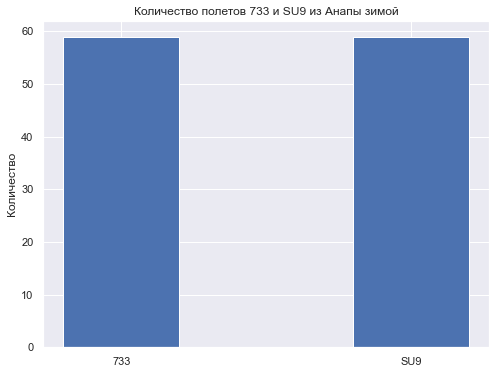

In [116]:
# Посмотрим на количество полетов самолетов.
print(data_group.groupby('aircraft_code').size())
fig, ax = plt.subplots()
fig.set_figwidth(8)    
fig.set_figheight(6)
ax.set_ylabel('Количество')
ax.set_title('Количество полетов 733 и SU9 из Анапы зимой')
ax.bar(x = ['733','SU9'], height = data_group.groupby('aircraft_code').size(), width = 0.4)

aircraft_code
733    1616.859932
SU9     701.307548
Name: proffit_with_fly_cost, dtype: float64


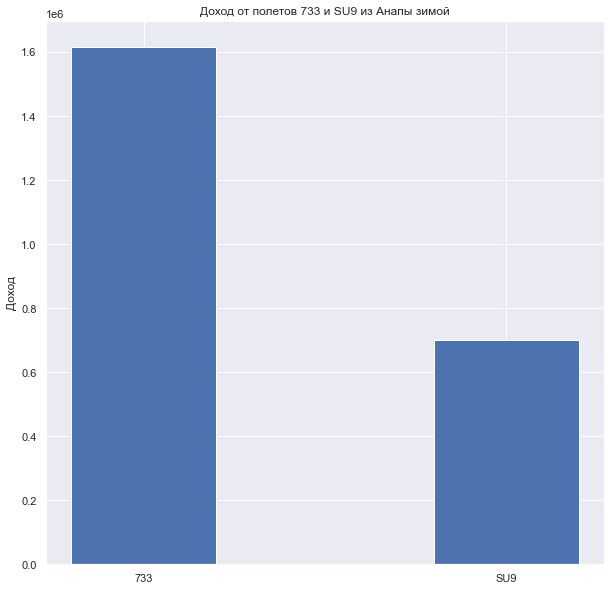

In [176]:
# Посмотрим на среднюю прибыль полетов.
print(data_group.groupby('aircraft_code')['proffit_with_fly_cost'].mean()/1000)
fig, ax = plt.subplots()
fig.set_figwidth(10)    
fig.set_figheight(10)
ax.set_ylabel('Доход')
ax.set_title('Доход от полетов 733 и SU9 из Анапы зимой')
ax.bar(x = ['733','SU9'], height = data_group.groupby('aircraft_code')['proffit_with_fly_cost'].mean(), width = 0.4)
plt.show()

aircraft_code
733    16201.962494
SU9    14001.742506
Name: 1minet_proffit, dtype: float64


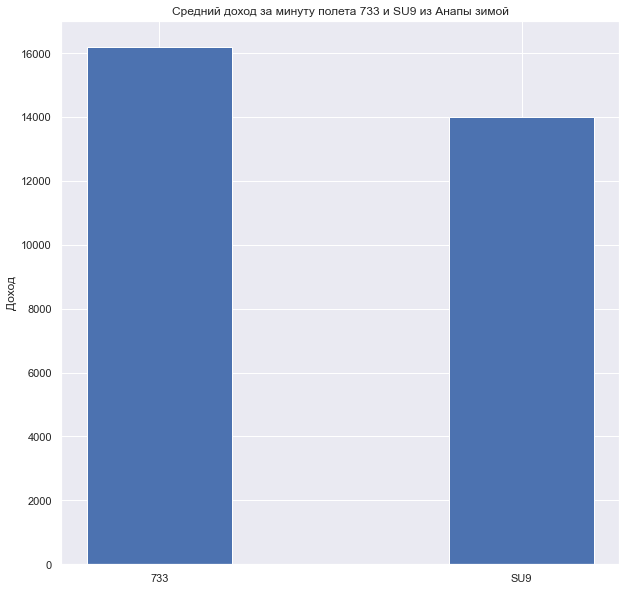

In [177]:
# Посмотрим на среднюю прибыль полетов самолетов за минуту полета.
print(data_group.groupby('aircraft_code')['1minet_proffit'].mean())
fig, ax = plt.subplots()
fig.set_figwidth(10)    
fig.set_figheight(10)
ax.set_ylabel('Доход')
ax.set_title('Средний доход за минуту полета 733 и SU9 из Анапы зимой')
ax.bar(x = ['733','SU9'], height = data_group.groupby('aircraft_code')['1minet_proffit'].mean(), width = 0.4)
plt.show()

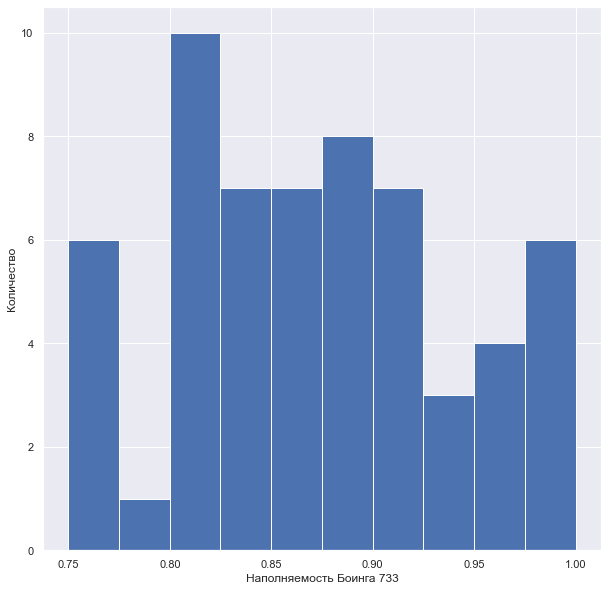

In [117]:
# Посмотрим на заполняемость Боинга 733.
fig, ax = plt.subplots()
# ax = fig.add_axes([0, 0, 1, 1])
ax.hist(data_group[data_group.aircraft_code == '733']['fullness'])
# Добавляем подписи
fig.set_figwidth(10)    
fig.set_figheight(10)
ax.set_xlabel('Наполняемость Боинга 733')
ax.set_ylabel('Количество')
plt.show()

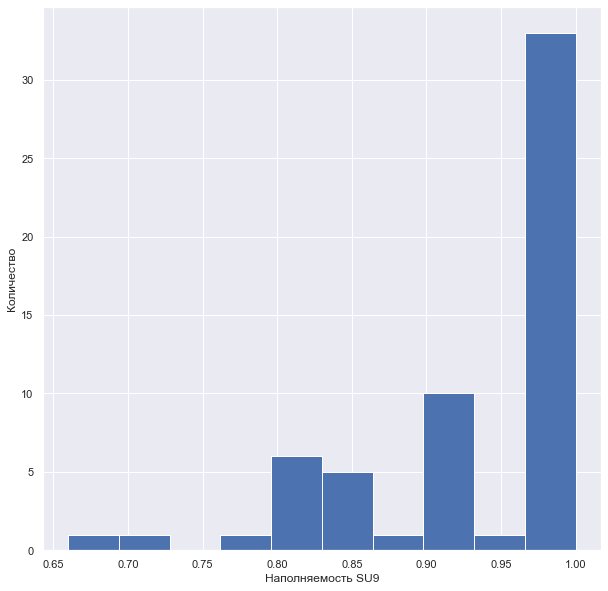

In [118]:
# Посмотрим на заполняемость SU9.
fig, ax = plt.subplots()
# ax = fig.add_axes([0, 0, 1, 1])
ax.hist(data_group[data_group.aircraft_code == 'SU9']['fullness'])
# Добавляем подписи
fig.set_figwidth(10)    
fig.set_figheight(10)
ax.set_xlabel('Наполняемость SU9')
ax.set_ylabel('Количество')
plt.show()


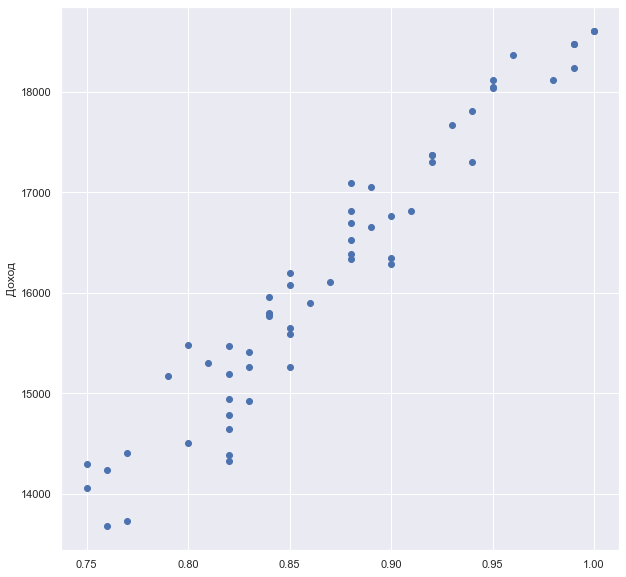

In [143]:
#Посмотрим на зависимость дохода за минуту полета от заполненности борта самолета Боинг 733
fig, ax = plt.subplots()
x = data_group[data_group.aircraft_code == '733']['fullness']
y = data_group[data_group.aircraft_code == '733']['1minet_proffit']
ax.scatter(x, y)    #  цвет точек
   #  заголовок для Axes
ax.set_xlabel('Наполняемость салона')
ax.set_ylabel('Доход')
fig.set_figwidth(10)     #  ширина и
fig.set_figheight(10)    #  высота "Figure"
ax.set_xlabel('')
plt.show()

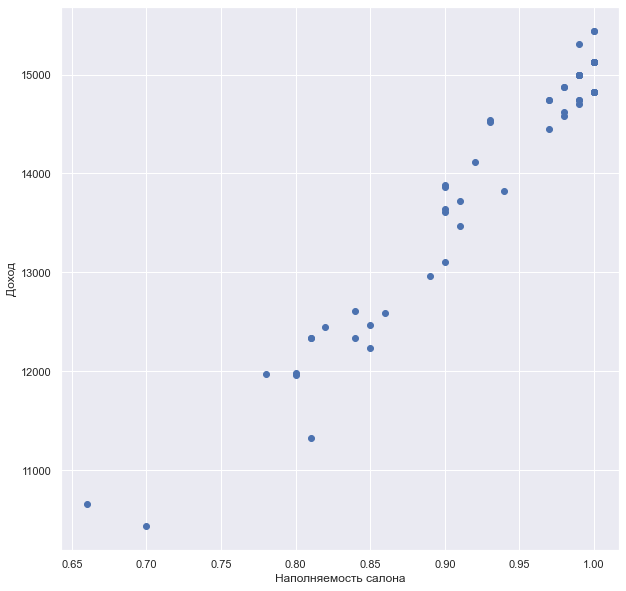

In [142]:
#Посмотрим на зависимость дохода за минуту полета от заполненности борта самолета SU9
fig, ax = plt.subplots()
x = data_group[data_group.aircraft_code == 'SU9']['fullness']
y = data_group[data_group.aircraft_code == 'SU9']['1minet_proffit']
ax.scatter(x, y)    #  цвет точек
   #  заголовок для Axes
ax.set_xlabel('Наполняемость салона')
ax.set_ylabel('Доход')
fig.set_figwidth(10)     #  ширина и
fig.set_figheight(10)    #  высота "Figure"

plt.show()

In [134]:
# Количество полетов по месяцам
pd.DataFrame(data_group.groupby(['aircraft_code', 'month']).size().unstack())

month,february,january
aircraft_code,,
733,28,31
SU9,28,31


In [126]:
# Количество Боингов 733 необходимое для перевоза всех пассажиров в феврале с учетом 100% заполненности борта.
data_group[(data_group.aircraft_code == '733')&(data_group.month=='february')]['fare_conditions'].sum()/130

24.176923076923078

In [127]:
# Количество Боингов 733 необходимое для перевоза всех пассажиров в январе с учетом 100% заполненности борта.
data_group[(data_group.aircraft_code == '733')&(data_group.month=='january')]['fare_conditions'].sum()/130

27.161538461538463

In [167]:
# Для повышения доходности от полетов Боинга 733 зимой предлагаю отказаться 
# от 8-ми самых незаполненых рейсов февраля и января. 
print('Рейсы в феврале ', list(data_group[(data_group.aircraft_code == '733')&(data_group.month=='february')].sort_values('fullness')[:4].index))
print('Рейсы в январе ', list(data_group[(data_group.aircraft_code == '733')&(data_group.month=='january')].sort_values('fullness')[:4].index))

Рейсы в феврале  [136360, 136250, 136351, 136486]
Рейсы в январе  [136122, 136178, 136464, 136202]


In [165]:
# Количество SU9 необходимое для перевоза всех пассажиров в феврале с учетом 100% заполненности борта.
data_group[(data_group.aircraft_code == 'SU9')&(data_group.month=='february')]['fare_conditions'].sum()/97

26.0

In [133]:
# Количество SU9 необходимое для перевоза всех пассажиров в январе с учетом 100% заполненности борта.
data_group[(data_group.aircraft_code == 'SU9')&(data_group.month=='january')]['fare_conditions'].sum()/97

28.855670103092784

In [168]:
# Для повышения доходности от полетов SU9 зимой предлагаю отказаться 
# от 4-х самых незаполненых рейсов февраля и января. 
print('Рейсы в феврале ', list(data_group[(data_group.aircraft_code == 'SU9')&(data_group.month=='february')].sort_values('fullness')[:2].index))
print('Рейсы в январе ', list(data_group[(data_group.aircraft_code == 'SU9')&(data_group.month=='january')].sort_values('fullness')[:2].index))

Рейсы в феврале  [136807, 136922]
Рейсы в январе  [136642, 136887]


In [ ]:
https://docs.google.com/presentation/d/1DtkosWMyGE03jOroJc7H6AGvdxBfZr-2nxZZGNUPk8c/edit?usp=sharing